### LLM

In [1]:
from langchain_groq import ChatGroq
model = ChatGroq(
    model="qwen-qwq-32b",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    #api_key = "x"
    api_key="x"
)

### Access Token Tool

In [2]:
import requests
import xml.etree.ElementTree as ET
from langchain_core.tools import tool

@tool
def get_access_token() -> str:
    """
    Retrieves an authentication access token for Pronto ERP API access.
    The token is required for all subsequent API calls.
    
    Returns:
        str: The access token string required for API authorization headers.        
    """
    url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/login"
    headers = {
        "X-Pronto-username": "aigen_user",
        "X-Pronto-Password": "fb785+0ee9D7DF0C457be",
        "X-Pronto-Content": "application/json",
    }
    form_data = {
        "user name": "aigen_user",
        "password": "fb785+0ee9D7DF0C457be",
    }

    response = requests.post(url, headers=headers, data=form_data)
    response.raise_for_status()

    root = ET.fromstring(response.text)
    token_element = root.find("token")
    access_token = token_element.text.strip() if token_element is not None else ""

    return access_token

### Inventory Tools

In [3]:
import requests
from langchain_core.tools import tool
from typing import List, Dict

# Working
@tool
def get_item_prices(
    access_token: str,
    limit: int = 10,
    offset: int = 10,
    item_code_like: str = "",
    price_region_code_like: str = "",
    type_code_like: str = ""
) -> str:
    """
    Retrieves item pricing information across different regions and item types with powerful filtering options.
    
    Args:
        access_token: Authorization token obtained from get_access_token().
        limit: Maximum number of price records to retrieve (pagination control).
        offset: Starting position for pagination (skip N records).
        item_code_like: Filter for matching item codes (supports SQL LIKE patterns).
        price_region_code_like: Filter for specific price regions (supports SQL LIKE patterns).
        type_code_like: Filter for specific price types (supports SQL LIKE patterns).
    
    Returns:
        str: XML response containing item pricing details including item codes, 
             price regions, and wholesale prices in a structured format.             
   """
    url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemPrices_V2"
    headers = {
        "X-Pronto-Token": access_token,
        "Content-Type": "application/json"
    }
    payload = {
        "InvGetItemPricesRequest": {
            "Parameters": {
                "Limit": str(limit),
                "Offset": str(offset)
            },
            "Filters": {
                "ItemCode": {"Like": item_code_like},
                "PriceRegionCode": {"Like": price_region_code_like},
                "TypeCode": {"Like": type_code_like}
            },
            "RequestFields": {
                "ItemPrices": {
                    "ItemPrice": {
                        "ItemCode": "",
                        "PriceRegionCode": "",
                        "WholesalePrice": "",
                        "TypeCode": ""
                    }
                }
            }
        }
    }

    response = requests.get(url, headers=headers, json=payload)
    response.raise_for_status()
    return response.text

# Working
@tool
def get_item_attributes(
    access_token: str,
    record_limit: int = 1000,
    item_code: str = "",
    attribute_id: str = "",
    sequence: str = "",
    limit: int = 2,
    offset: str = "",
    type_code_like: str = ""
) -> str:
    """
    Retrieves detailed product attribute information for specified items.
    
    Args:
        access_token: Authorization token obtained from get_access_token().
        record_limit: Maximum total records to retrieve across all pages.
        item_code: Filter for a specific item code (exact match).
        attribute_id: Filter for a specific attribute identifier (exact match).
        sequence: Filter by attribute sequence number.
        limit: Maximum records per page (pagination control).
        offset: Starting position for pagination.
        type_code_like: Filter for attribute types (supports SQL LIKE patterns).
    
    Returns:
        str: XML response containing attribute details including IDs, values,
             item codes, and type classifications in a structured format.
    """
    url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemAttributes_V2"
    headers = {
        "X-Pronto-Token": access_token,
        "Content-Type": "application/json"
    }
    payload = {
        "InvGetItemAttributes": {
            "RecordLimit": str(record_limit),
            "Parameters": {
                "ItemCode": item_code,
                "AttribteID": attribute_id,
                "Sequence": sequence,
                "Limit": str(limit),
                "Offset": offset
            },
            "Filters": {
                "TypeCode": {"Like": type_code_like}
            },
            "RequestFields": {
                "ItemAttributes": {
                    "ItemAttribute": {
                        "AttributeID": "",
                        "AttributeValue": "",
                        "ItemCode": "",
                        "Sequence": "",
                        "TypeCode": ""
                    }
                }
            }
        }
    }

    response = requests.get(url, headers=headers, json=payload)
    response.raise_for_status()
    return response.text

# Working when passing Empty List String "[]" in Item - Not sure if Response is relevant to what is required
# @tool
# def get_item_price_for_item_whse_customer(
#     access_token: str,
#     items: List[Dict[str, str]]
# ) -> str:
#     """
#     Calls InvGetItemPriceForItemWhseCustomerRequest API with a list of item-warehouse-customer entries.

#     Args:
#         access_token: X-Pronto-Token header value.
#         items: A list of dicts, each with keys:
#             - ItemCode (str)
#             - Qty (str or int)
#             - CustomerCode (str)
#             - WarehouseCode (str)

#     Returns:
#         API response text.
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemPrices_V2"
#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }
#     # Build payload exactly as in your curl
#     payload = {
#         "InvGetItemPriceForItemWhseCustomerRequest": {
#             "Items": {
#                 "Item": items
#             }
#         }
#     }

#     response = requests.get(url, headers=headers, json=payload)
#     response.raise_for_status()
#     return response.text
   
# Working
@tool
def get_all_item_prices(
    access_token: str,
    limit: str = "",
    offset: str = "",
    item_code_like: str = "",
    price_region_code_like: str = "",
    type_code_like: str = ""
) -> str:
    """
    Retrieves comprehensive pricing data with optional filters.

    Args:
        access_token: Authorization token obtained from get_access_token().
        limit: Optional maximum records to retrieve (empty for all).
        offset: Optional pagination offset (empty for beginning).
        item_code_like: Optional filter for matching item codes.
        price_region_code_like: Optional filter for matching price regions.
        type_code_like: Optional filter for matching price types.
    
    Returns:
        str: XML response with comprehensive pricing data including item codes,
             regions, and wholesale prices. May contain large result sets.
    """
    url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemPrices_V2"
    headers = {
        "X-Pronto-Token": access_token,
        "Content-Type": "application/json"
    }
    payload = {
        "InvGetItemPricesRequest": {
            "Parameters": {
                "Limit": limit,
                "Offset": offset
            },
            "Filters": {
                "ItemCode": {"Like": item_code_like},
                "PriceRegionCode": {"Like": price_region_code_like},
                "TypeCode": {"Like": type_code_like}
            },
            "RequestFields": {
                "ItemPrices": {
                    "ItemPrice": {
                        "ItemCode": "",
                        "PriceRegionCode": "",
                        "WholesalePrice": "",
                        "TypeCode": ""
                    }
                }
            }
        }
    }

    response = requests.get(url, headers=headers, json=payload)
    response.raise_for_status()
    return response.text

# Null Response
# @tool
# def get_item_serials(
#     access_token: str,
#     item_code_like: str,
#     limit: int = 5
# ) -> str:
#     """
#     Calls the InvGetItemSerialsRequest API to fetch item serials based on ItemCode filter.

#     Args:
#         access_token: X-Pronto-Token header value.
#         item_code_like: Filter for ItemCode using LIKE operator.
#         limit: Number of records to retrieve (default is 5).

#     Returns:
#         API response text.
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemPrices_V2"
#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }
#     payload = {
#         "InvGetItemSerialsRequest": {
#             "Parameters": {
#                 "Limit": str(limit)
#             },
#             "Filters": {
#                 "ItemCode": {
#                     "Like": item_code_like
#                 }
#             },
#             "RequestFields": {
#                 "ItemSerials": {
#                     "ItemSerial": {
#                         "ContractNo": "",
#                         "ItemCode": "",
#                         "SerialNo": "",
#                         "StatusCode": ""
#                     }
#                 }
#             }
#         }
#     }

#     response = requests.get(url, headers=headers, json=payload)
#     response.raise_for_status()
#     return response.text
    
# Not Working
# @tool
# def get_item_prices_no_payload(access_token: str) -> str:
#     """
#     Calls the InvGetItemPrices_V2 API without any payload.

#     Args:
#         access_token: X-Pronto-Token header value.

#     Returns:
#         API response text.
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemPrices_V2"
#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }

#     response = requests.post(url, headers=headers, data='')  # Sending empty string as body
#     response.raise_for_status()
#     return response.text
    
# Working - Updated URL and Payload for this
@tool
def get_item_warehouses(
    access_token: str,
    record_limit: int = 2,
    warehouse_code_like: str = ""
) -> str:
    """
    Retrieves inventory stock levels and warehouse distribution data.
    
    Args:
        access_token: Authorization token obtained from get_access_token().
        record_limit: Maximum number of warehouse records to retrieve.
        warehouse_code_like: Filter for specific warehouses (supports SQL LIKE patterns).
    
    Returns:
        str: XML response containing warehouse inventory data including:
             - On-hand quantities
             - Backorder quantities
             - Warehouse locations and codes
    """
    url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemWarehouses_V2"
    headers = {
        "X-Pronto-Token": access_token,
        "Content-Type": "application/json"
    }

    payload = {
        "InvGetItemWarehousesRequest": {
            "RecordLimit": str(record_limit),
            "Parameters": {
                "ItemCode": { "Like": warehouse_code_like}
            },
            "RequestFields": {
                "ItemWarehouses": {
                    "ItemWarehouse": {
                        "ItemCode": "",
                        "OnHandQty": "",
                        "BackOrdersQty": "",
                        "WarehouseCode": "",
                    }
                }
            }
        }
    }

    response = requests.get(url, headers=headers, json=payload)
    response.raise_for_status()
    return response.text

# Null Response
# @tool
# def get_item_warehouse_details(
#     access_token: str,
#     warehouse_code: str = "0001",
#     item_code: str = "MEHE INV3",
#     filter_warehouse_code_like: str = "Diff",
#     record_limit: int = 99
# ) -> str:
#     """
#     Calls the InvGetItemWhseForItemWhseRequest API to retrieve warehouse details for a specific item.

#     Args:
#         access_token: X-Pronto-Token header value.
#         warehouse_code: Exact warehouse code.
#         item_code: Specific item code.
#         filter_warehouse_code_like: Filter for warehouse code using LIKE.
#         record_limit: Maximum number of records to retrieve.

#     Returns:
#         API response text.
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/InvGetItemPrices_V2"
#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }
#     payload = {
#         "InvGetItemWhseForItemWhseRequest": {
#             "RecordLimit": str(record_limit),
#             "Parameters": {
#                 "WarehouseCode": warehouse_code,
#                 "ItemCode": item_code
#             },
#             "Filters": {
#                 "WarehouseCode": {
#                     "Like": filter_warehouse_code_like
#                 }
#             },
#             "RequestFields": {
#                 "ItemWarehouses": {
#                     "ItemWarehouse": {
#                         "ALLFIELDS": ""
#                     }
#                 }
#             }
#         }
#     }

#     response = requests.get(url, headers=headers, json=payload)
#     response.raise_for_status()
#     return response.text



inventory_tools = [get_access_token, 
                   get_item_prices, 
                   get_item_attributes, 
                #    get_item_price_for_item_whse_customer,
                   get_all_item_prices,
                #    get_item_serials,
                #    get_item_prices_no_payload,
                #    get_item_warehouse_details,
                   get_item_warehouses 
                   ]

### Sales Tools

In [4]:
import requests
from langchain_core.tools import tool

# Working
#TODO: Limit optional 
@tool
def get_sales_orders(
    access_token: str,
    limit: int = 10
) -> str:
    """
    Retrieves active sales orders from the Pronto ERP system.
    
    Args:
        access_token: Authorization token obtained from get_access_token().
        limit: Maximum number of sales orders to retrieve (default 10).
    
    Returns:
        str: XML response containing sales order details including:
             - Order numbers
             - Status codes and current processing state
             - Territory and regional assignment
             - Operator identification
             - Order source information
    """
    url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/SalesOrderGetSalesOrders_V2"
    headers = {
        "X-Pronto-Token": access_token,
        "Content-Type": "application/json"
    }
    payload = {
        "SalesOrderGetSalesOrdersRequest": {
            "Parameters": {
                "Limit": str(limit)
            },
            "RequestFields": {
                "SalesOrders": {
                    "SalesOrder": {
                        "Count": "",
                        "SOOrderNo": "", # Filters which are optional
                        "StatusCode": "",
                        "TerritoryCode": "",
                        "OperatorCode": "",
                        "SourceCode": ""
                    }
                }
            }
        }
    }

    response = requests.post(url, headers=headers, json=payload)
    response.raise_for_status()
    return response.text

# Working but null response
# @tool
# def get_sales_order_delivery_details(
#     access_token: str,
#     limit: int = 5,
#     offset: int = 1
# ) -> str:
#     """
#     Retrieves delivery address details for sales orders using the SalesOrderGetSalesOrderDeliveryDetailsRequest endpoint.

#     Args:
#         access_token: X-Pronto-Token header value.
#         limit: Number of records to retrieve.
#         offset: Offset for pagination.

#     Returns:
#         Response JSON as a string.
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/SalesOrderGetSalesOrders_V2"
    
#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }

#     payload = {
#         "SalesOrderGetSalesOrderDeliveryDetailsRequest": {
#             "Parameters": {
#                 "Limit": str(limit),
#                 "Offset": str(offset)
#             },
#             "RequestFields": {
#                 "SalesOrderDeliveryDetails": {
#                     "SalesOrderDelivery": {
#                         "Address1": "",
#                         "Address2": "",
#                         "Address3": "",
#                         "Address4": "",
#                         "Address5": "",
#                         "Address6": "",
#                         "AddressName": "",
#                         "AddressPostcode": "",
#                         "SOBOSuffix": "",
#                         "SOOrderNo": "",
#                         "TypeCode": ""
#                     }
#                 }
#             },
#             "_xmlns": "http://www.pronto.net/so/1.0.0"
#         }
#     }

#     response = requests.get(url, headers=headers, json=payload)
#     response.raise_for_status()
#     return response.text
    
# Working but null response
# @tool
# def get_sales_order_lines(
#     access_token: str,
#     order_number: str,
#     limit: int = 15,
#     offset: int = 0
# ) -> str:
#     """
#     Retrieves sales order line details for a given sales order number.

#     Args:
#         access_token: The X-Pronto-Token value for API authentication.
#         order_number: Sales Order Number (SOOrderNo) to fetch line items for.
#         limit: Number of records to return (default: 15).
#         offset: Record offset for pagination (default: 0).

#     Returns:
#         API response content as a string. Key fields in the response include:
        
#         - SOBOSuffix: Sales Order Back Order Suffix — tracks variations like work order links.
#         - SOOrderNo: Sales Order Number (used as the primary identifier).
#         - TypeCode: Type of sales order line. Common values:
#             - SN: Normal line
#             - KN: Kit line
#             - SC: Charge line
#             - ST: Sales tax only line
#             - RS, RR, RN, etc.: Other custom line types
#         - UOMCode: Unit of Measure (e.g., EA = Each, KG = Kilogram, PK = Pack).
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/SalesOrderGetSalesOrders_V2"

#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }

#     payload = {
#         "SalesOrderGetSalesOrderLinesRequest": {
#             "Parameters": {
#                 "Limit": str(limit),
#                 "Offset": str(offset),
#                 "SOOrderNo": order_number
#             },
#             "RequestFields": {
#                 "SalesOrderLines": {
#                     "SalesOrderLine": {
#                         "ItemCode": "",
#                         "ItemUnitConversion": "",
#                         "OrderedQty": "",
#                         "SOBOSuffix": "",
#                         "SOOrderNo": "",
#                         "SequenceNo": "",
#                         "TypeCode": "",
#                         "UOMCode": ""
#                     }
#                 }
#             }
#         }
#     }

#     response = requests.get(url, headers=headers, json=payload)
#     response.raise_for_status()
#     return response.text

# Working but null response
# Function name get_sales_order similar as another one
# @tool
# def get_sales_order(
#     access_token: str,
#     order_number: str,
#     limit: int = 5,
#     offset: int = 1
# ) -> str:
#     """
#     Retrieves sales order notes for a specific sales order number.

#     Args:
#         access_token: The X-Pronto-Token value for authenticating with the API.
#         order_number: Sales Order Number (SOOrderNo) to fetch notes for.
#         limit: Maximum number of notes to retrieve (default: 5).
#         offset: Pagination offset (default: 1).

#     Returns:
#         API response content as a string. Key fields in the response include:

#         - SOOrderNo: Sales Order Number – unique identifier for the order.
#         - SOBOSuffix: Sales Order Back Order Suffix. Tracks variations such as:
#             - A-Z or AA-ZZ: Normal/backorder suffix
#             - ~W: Work Order linked to Purchase Order
#             - ~S: Sales Order linked to Work Order
#             - ~T: Work Order linked to Transfer Sales Order
#         - TypeCode: Type of sales order line. Possible values:
#             - SN: Normal line
#             - KN: Kit line
#             - SS: Special line
#             - SC: Charge line
#             - ST: Sales tax only line
#             - RR: Returned rotatable stock items
#             - RS: Sale of an asset
#             - DN: Note line
#             - WN: Stock from alternate warehouse
#             - RN: Rental
#             - SW: Warranty serial lines
#         - NoteCode: Code identifying the type or purpose of the note.
#         - SequenceNo: Order of the note in the sequence.
#         - Text: Content of the sales order note.
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/SalesOrderGetSalesOrders_V2"

#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }

#     payload = {
#         "SalesOrderGetSalesOrderNotesRequest": {
#             "Parameters": {
#                 "Limit": str(limit),
#                 "Offset": str(offset),
#                 "SOOrderNo": order_number
#             },
#             "Filters": "",
#             "RequestFields": {
#                 "SalesOrderNotes": {
#                     "SalesOrderNote": {
#                         "NoteCode": "",
#                         "SOBOSuffix": "",
#                         "SOOrderNo": "",
#                         "SequenceNo": "",
#                         "Text": "",
#                         "TypeCode": ""
#                     }
#                 }
#             }
#         }
#     }

#     response = requests.get(url, headers=headers, json=payload)
#     response.raise_for_status()
#     return response.text

# Working but null response
# @tool
# def get_sales_orders_by_warehouse(
#     access_token: str,
#     warehouse_code: str,
#     limit: int = 5,
#     offset: int = 5
# ) -> str:
#     """
#     Fetches a list of sales orders filtered by warehouse code.

#     Args:
#         access_token: X-Pronto-Token used for authenticating API requests.
#         warehouse_code: Filter sales orders by WarehouseCode using 'Like' match (e.g., 'syd').
#         limit: Number of records to fetch (default: 5).
#         offset: Pagination offset (default: 5).

#     Returns:
#         JSON response as string containing sales order information with the following fields:

#         - SOOrderNo: Sales Order Number — unique identifier for the order.
#         - SOBOSuffix: Sales Order Back Order Suffix — identifies variants:
#             - A-Z or AA-ZZ: Normal/backorder suffix
#             - ~W: Work Order linked to Purchase Order
#             - ~S: Sales Order linked to Work Order
#             - ~T: Work Order linked to Transfer Sales Order
#         - CustomerCode: Code of the customer who placed the order.
#     """
#     url = "https://xi.testing-dc4.prontocloud.com.au/pronto/rest/dem.ai_api/api/SalesOrderGetSalesOrders_V2"

#     headers = {
#         "X-Pronto-Token": access_token,
#         "Content-Type": "application/json"
#     }

#     payload = {
#         "SalesOrderGetSalesOrdersRequest": {
#             "Parameters": {
#                 "Limit": str(limit),
#                 "Offset": str(offset)
#             },
#             "Filters": {
#                 "WarehouseCode": {
#                     "Like": warehouse_code
#                 }
#             },
#             "RequestFields": {
#                 "SalesOrders": {
#                     "SalesOrder": {
#                         "SOOrderNo": "",
#                         "SOBOSuffix": "",
#                         "CustomerCode": ""
#                     }
#                 }
#             }
#         }
#     }

#     response = requests.get(url, headers=headers, json=payload)
#     response.raise_for_status()
#     return response.text


sales_tools = [get_access_token, 
               get_sales_orders,
            #    get_sales_order_delivery_details,
            #    get_sales_order_lines,
            #    get_sales_order,
            #    get_sales_orders_by_warehouse
               ]   

### Inventory Agent

In [5]:
from langgraph.prebuilt import create_react_agent

inventory_agent = create_react_agent(model=model, tools=inventory_tools, name="inventory_agent", prompt="You are an inventory expert. Always call get_access_token first, then use one inventory tool at a time.")

In [6]:
# from langchain_core.messages import HumanMessage

# for step in inventory_agent.stream(
#     {"messages": [HumanMessage(content="")]},
#     stream_mode="values",
# ):
#     step["messages"][-1].pretty_print()

### Sales Agent

In [6]:
from langgraph.prebuilt import create_react_agent

sales_agent = create_react_agent(model=model, tools=sales_tools, name="sales_agent", prompt="You are a sales expert. Always call get_access_token first, then use one sales tool at a time.")


In [8]:
# from langchain_core.messages import HumanMessage

# for step in sales_agent.stream(
#     {"messages": [HumanMessage(content="")]},
#     stream_mode="values",
# ):
#     step["messages"][-1].pretty_print()

### Supervisor

In [8]:
from langgraph_supervisor import create_supervisor
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
supervisor_agent = create_supervisor(
    [sales_agent, inventory_agent],
    model=model,
    prompt=(
        "You are a Pronto ERP supervisor managing specialized agents. "
        "For inventory-related queries (item prices, attributes, stock levels, warehouses), use inventory_agent. "
        "For sales-related queries (orders, customer data, sales status), use sales_agent. "
        "For complex queries requiring both, break down the task and coordinate between agents sequentially. "
        "Always synthesize information clearly for the user."
    )
).compile(checkpointer=memory)


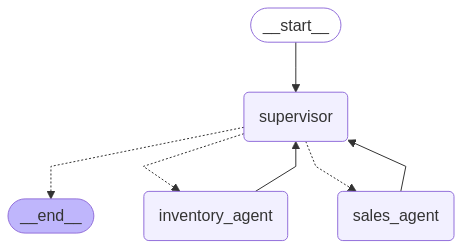

In [9]:
from IPython.display import Image, display

display(Image(supervisor_agent.get_graph().draw_mermaid_png()))

### Questions

#### Inventory

* What are the current prices of Coke and Coke Vanilla?
* Can you list all attributes for product GEE005?
* How many units of AAA batteries are on backorder?
* Can you show me the inventory levels by warehouse location?

#### Sales

* How many sales orders are in the IL01 territory?
* Which sales orders are managed by operator JBW?

#### Combined

* How many sales orders are there in the 2M territory, and how many units of the AC37914 product are backordered?

In [10]:
from langchain_core.messages import HumanMessage
config = {"configurable": {"thread_id": "1"}}
printed_message_ids = set()
for step in supervisor_agent.stream(
    {"messages": [HumanMessage(content="How many sales orders are there in the 2M territory, and how many units of the AC37914 product are backordered?")]},
    stream_mode="values",
    config=config,
    subgraphs=True  
):

    if isinstance(step, tuple):
        namespace, update = step
        if len(namespace) > 0:
            for message in update.get("messages", []):
                if message.id not in printed_message_ids:
                    message.pretty_print()
                    printed_message_ids.add(message.id)
    else:
        for message in step.get("messages", []):
            if message.id not in printed_message_ids:
                message.pretty_print()
                printed_message_ids.add(message.id)


================================ Human Message =================================

How many sales orders are there in the 2M territory, and how many units of the AC37914 product are backordered?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_sales_agent (call_aaba)
 Call ID: call_aaba
  Args:
  transfer_to_inventory_agent (call_w0d3)
 Call ID: call_w0d3
  Args:
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_sales_agent (call_aaba)
 Call ID: call_aaba
  Args:
================================= Tool Message =================================
Name: transfer_to_sales_agent

Successfully transferred to sales_agent
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_inventory_agent (call_w0d3)
 Call ID: call_w0d3
  Args:
================================= Tool Message =====

APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `qwen-qwq-32b` in organization `org_01jqrhkcr1fggvbs91q7ywz8fs` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Requested 23839, please reduce your message size and try again. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}